In [1]:
cd ../src

/Users/erdem/industry-code-2-vec/src


In [2]:
from no_ing_model import generate_embeddings

embedding_df, distance_df = generate_embeddings(experiment_mode=True)

/Users/erdem/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
naics_code1 (InputLayer)        (None, 10)           0                                            
__________________________________________________________________________________________________
naics_code2 (InputLayer)        (None, 10)           0                                            
__________________________________________________________________________________________________
word_embedding (Embedding)      (None, 10, 300)      420000      naics_code1[0][0]                
                                                                 naics_code2[0][0]                
__________________________________________________________________________________________________
dropout (SpatialDropout1D)      (Non

In [3]:
import numpy as np

np.array(embedding_df["Embedding"].apply(str).value_counts())

array([1, 1, 1, ..., 1, 1, 1])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1057 samples in 0.001s...
[t-SNE] Computed neighbors for 1057 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1057
[t-SNE] Computed conditional probabilities for sample 1057 / 1057
[t-SNE] Mean sigma: 0.107538
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.215084
[t-SNE] Error after 1000 iterations: 0.333162


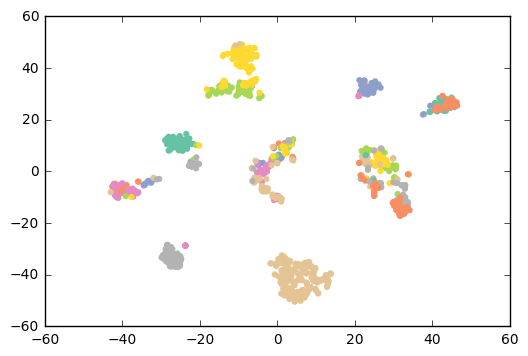

In [4]:
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

COLOR_DIGIT = 2

def plot_embedding(df):
    X_embedded = TSNE(n_components=2, verbose=1).fit_transform(np.array(df["Embedding"].values.tolist()))
    
    code_top_digit = sorted(list(set([code[:COLOR_DIGIT] for code in df["Code"]])))
    
    rgb_values = sns.color_palette("Set2", len(code_top_digit))
    color_map = dict(zip(code_top_digit, rgb_values))
    
    x = X_embedded[:,0]
    y = X_embedded[:,1]

    industry_l = [title for title in df["Title"]]
    color_l = [color_map.get(ind[:COLOR_DIGIT], rgb_values[-1]) for ind in df["Code"]]
    plt.scatter(x,y, c=color_l, linewidths=0)
    
plot_embedding(embedding_df)

In [5]:
embedding_df.sample(10)

,Code,Title,Embedding
1015,424120,stationery and office supplies merchant wholes...,"[0.5600661039352417, -0.20437079668045044, -0...."
2157,923120,administration of public health programs,"[-0.8253247737884521, -0.1431138813495636, -0...."
947,423330,"roofing, siding, and insulation material merch...","[0.5835659503936768, -0.19706016778945923, -0...."
1650,541490,other specialized design services,"[0.37696731090545654, -0.8535088300704956, 0.1..."
1622,541213,tax preparation services,"[0.4813680648803711, -0.7597286701202393, 0.26..."
1660,541612,human resources consulting services,"[0.4989906847476959, -0.8279082775115967, 0.15..."
1420,512191,tele production and other postproduction services,"[0.6111305952072144, -0.8786100149154663, 0.07..."
1743,561499,all other business support services,"[0.11253257095813751, -0.9022349715232849, 0.1..."
1932,711110,theater companies and dinner theaters,"[0.7322366833686829, 0.7720993757247925, -0.16..."
1227,453220,"gift, novelty, and souvenir stores","[1.4041874408721924, -0.246401846408844, -0.92..."


In [6]:
distance_df[distance_df["Code_x"] == "111150"].sort_values("pred_dist").head(20)

,Code_x,Title_x,Code_y,Title_y,distance,pred_dist
4232,111150,corn farming,111150,corn farming,0,0.000000
4233,111150,corn farming,111160,rice farming,2,0.006795
4271,111150,corn farming,112512,shellfish farming,4,0.010432
4268,111150,corn farming,112410,sheep farming,4,0.018126
4269,111150,corn farming,112420,goat farming,4,0.018459
4242,111150,corn farming,111333,strawberry farming,3,0.023081
4234,111150,corn farming,111191,oilseed and grain combination farming,2,0.025763
4255,111150,corn farming,111991,sugar beet farming,3,0.026895
4236,111150,corn farming,111211,potato farming,3,0.027251
4254,111150,corn farming,111940,hay farming,3,0.031069
